In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create dictionary 
d={'Age':[9 , 9, 10,10,10,11,12,36]}
#convert this dictionary into dataframe
df=pd.DataFrame(d)
print(df)

   Age
0    9
1    9
2   10
3   10
4   10
5   11
6   12
7   36


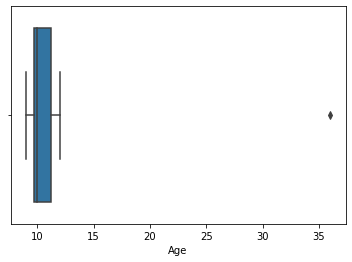

In [3]:
sns.boxplot(data=df,x="Age")
plt.show()

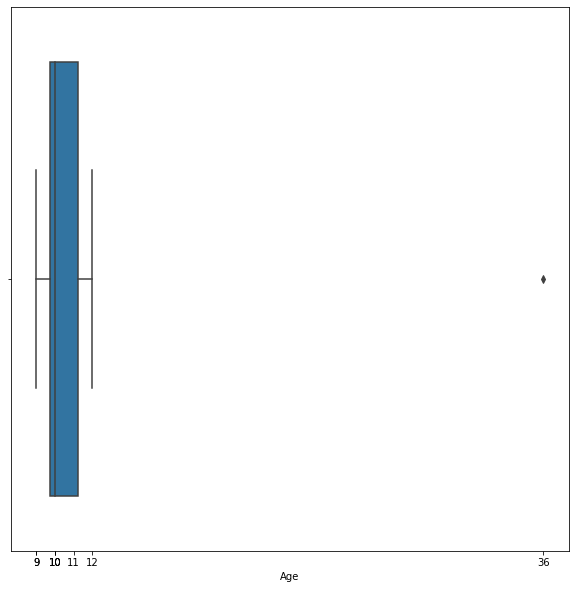

In [4]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="Age")
plt.xticks(df["Age"])
plt.show()

In [5]:
#remove outlier in dataframe df
#to access record anr record no. of those records whose value of Age >12
df[df["Age"]>12] #df[condition]

,Age
7,36


In [6]:
#to delete record no. 7 from dataframe df permanently
df.drop(7,inplace=True) #drop(recordno,inplace=True)

In [7]:
df

,Age
0,9
1,9
2,10
3,10
4,10
5,11
6,12


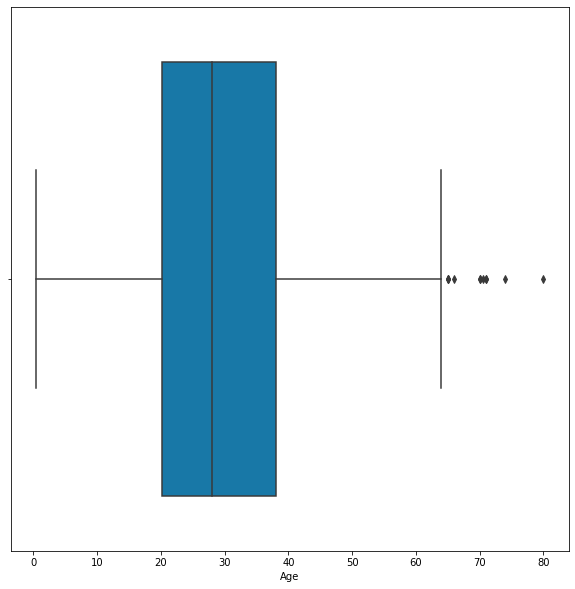

In [26]:
#After  remove outlier  , create a boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="Age",palette='winter')
plt.show()

In [9]:
import os
os.getcwd()

'C:\\Users\\Rajesh'

In [60]:
#To load titanic.csv file
df=pd.read_csv("titanic.csv")

In [11]:
#to show first 5 records in dataframe titanic
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


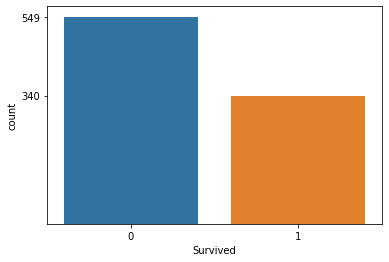

In [56]:
sns.countplot(data=df,x="Survived")
c=df["Survived"].value_counts()
plt.yticks(c)
plt.show()

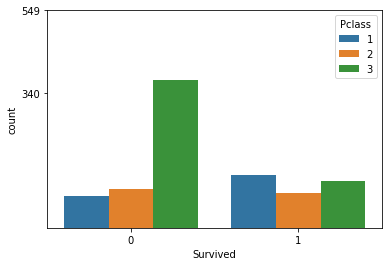

In [57]:
sns.countplot(data=df,x="Survived",hue="Pclass")
c=df["Survived"].value_counts()
plt.yticks(c)
plt.show()

In [12]:
#How many rows and columns
df.shape

(891, 12)

In [13]:
df.shape[0]

891

In [61]:
#check null values in dataframe df
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#find the percentage of null values of each column of dataframe df
df.isnull().sum()/df.shape[0]*100 #df.shape[0] no. of rows only

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

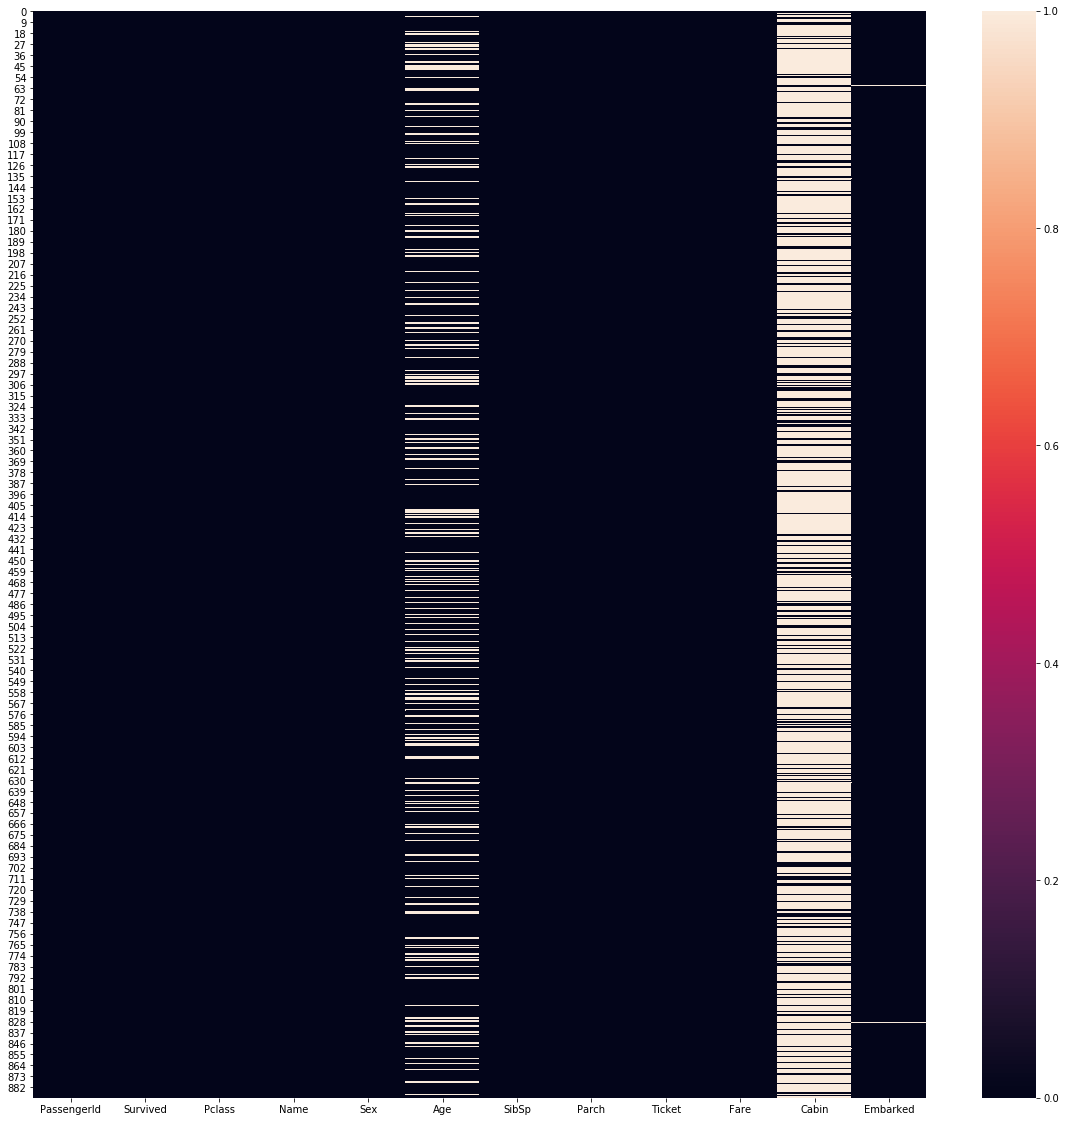

In [16]:
#show null values on heatmap()
plt.figure(figsize=(20,20)) #width=20 and height=20
sns.heatmap(df.isnull())
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
df["Age"].mean()

29.69911764705882

In [19]:
df["Age"].median()

28.0

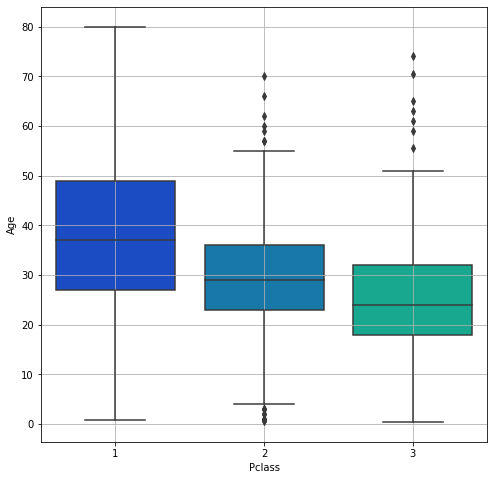

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='Pclass',y='Age',palette='winter')
plt.grid() #line in  row and col (create graph paper)
plt.show()

In [ ]:
'''Pclass=1    Age =37(median)
   Pclass=2    Age=29 (median)
   Pclass=3    Age=23(median)'''

In [30]:
#create user defined function 
def impute_age(cols): #impute_age() USER defined function
    #memory allot in cols
    #passing argument/parameter and return value
    #here cols parameter (Age and Pclass) start index =0 
    Age=cols[0] 
    Pclass=cols[1]
    if(pd.isnull(Age)): #outer if
        if(Pclass==1):  #inner if
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 23
    else: #else of outer   
      return Age     
        
    

In [32]:
#call function 
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1) 
#apply() work as for loop

In [33]:
#check null values in Age
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#to show those records whose Pclass=1 and Age=37
df[(df['Pclass']==1) & (df["Age"]==37)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.0,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,37.0,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,37.0,0,0,PC 17605,27.7208,NaN,C
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,37.0,0,1,113505,55.0000,E33,S
168,169,0,1,"Baumann, Mr. John D",male,37.0,0,0,PC 17318,25.9250,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,37.0,0,0,113767,50.0000,A32,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,37.0,0,0,PC 17585,79.2000,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,37.0,0,0,113798,31.0000,NaN,S


In [38]:
#to show those records whose Pclass=2 and Age=29
df[(df['Pclass']==2) & (df["Age"]==29)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,29.0,0,0,SC/PARIS 2131,15.0500,NaN,C
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.0,0,0,239853,0.0000,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,29.0,0,0,226593,12.3500,E101,Q
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C


In [40]:
#Find the % of null values of each column in df
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [42]:
df["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
C22 C26        3
D              3
F2             3
C68            2
E67            2
B58 B60        2
D36            2
F4             2
E24            2
F G73          2
B51 B53 B55    2
C2             2
C124           2
C65            2
C123           2
D17            2
B18            2
B28            2
C92            2
D33            2
D26            2
C93            2
B22            2
B49            2
B35            2
              ..
B79            1
C118           1
A16            1
D56            1
A26            1
C30            1
E63            1
C104           1
B80            1
D21            1
E38            1
D10 D12        1
E40            1
C106           1
B86            1
A24            1
B101           1
D30            1
C32            1
D48            1
A31            1
A23            1
D28            1
D46            1
E50            1
E68            1
F38            1
E58           

In [43]:
#Now Next see  Cabin column --> 77% null values found in cabin column,
#means lot of  null values , means
#we should be srop the Cabin column from df  permanently then inplace=True
df.drop("Cabin",axis=1,inplace=True)

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [45]:
#Again check null values in dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [49]:
df["Embarked"].dtypes   #O means object 

dtype('O')

In [50]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
df.dropna(inplace=True)  #to delete null row permanent
#axis=0 by default row means to delete those rows which found null

In [53]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

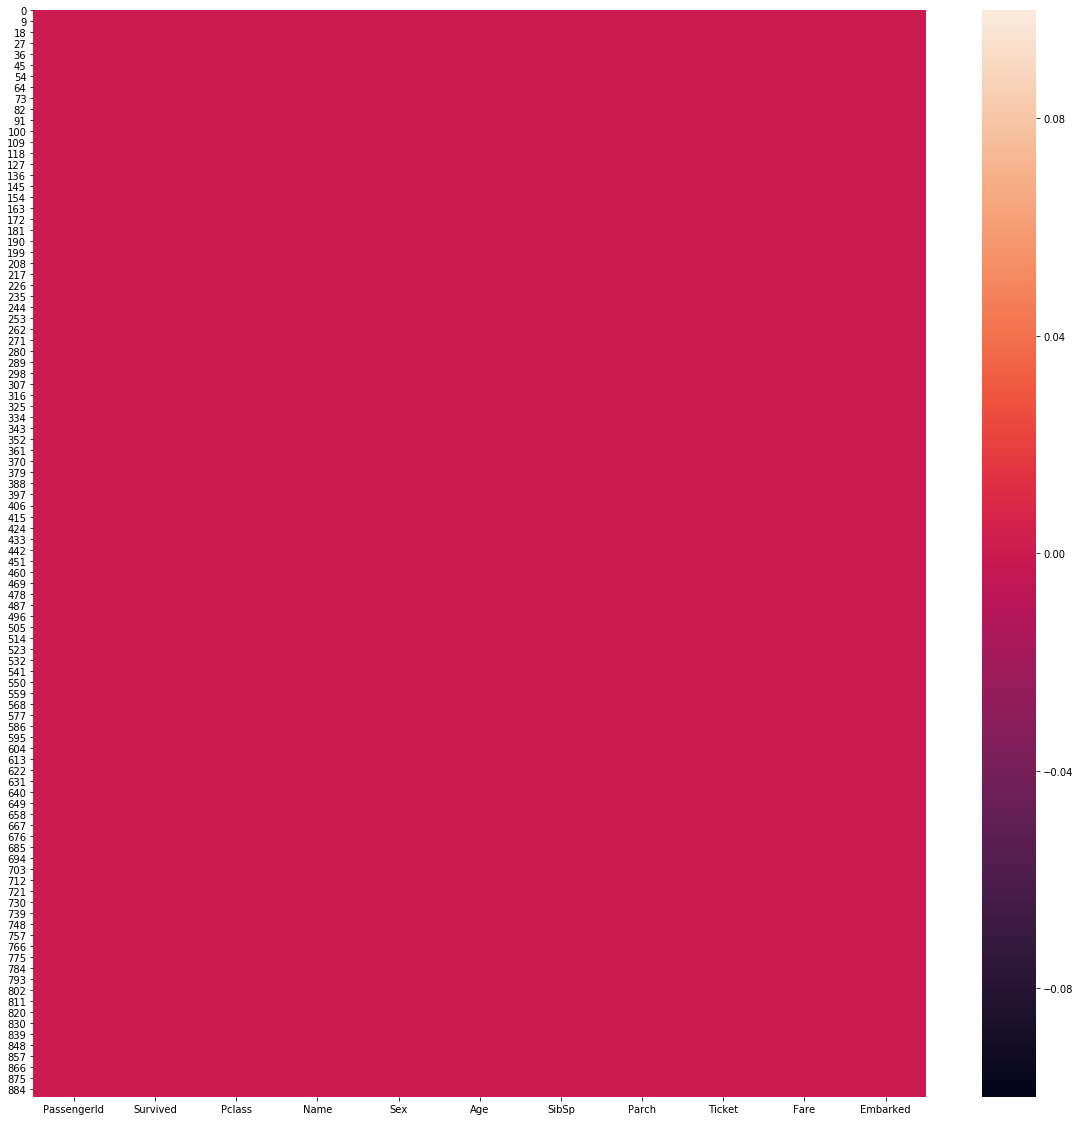

In [54]:
#visualise 
#show null values on heatmap()
plt.figure(figsize=(20,20)) #width=20 and height=20
sns.heatmap(df.isnull())
plt.show()